In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import csv
import random

C:\Users\kuzlu\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
# The target variable is 'power'.
df = pd.read_csv('data/PV_Data.csv') # Load the data
df = df.drop(['Index','Date'], axis=1)
#df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df["Time_Index"] = df["Time_Index"].astype('category')
df = df.rename(columns={"Time_Index": "TI", "tcwl": "TCWL", "tciw": "TCIW", "SP": "SP", 
                        "hum": "HUM", "tcc": "TCC", "u": "U",  "v": "V", "temp": "TEMP", 
                        "TP": "TP", "SSRD": "SSRD", "STRD": "STRD", "TSR": "TSR", "Power": "POW"}, errors="raise")
#Drop Time_Index
df = df.drop(['TI'], axis=1)
#####Narmalization
scaler = StandardScaler()
scaler.fit(df.drop('POW', axis =1))
scaled_features = scaler.transform(df.drop('POW', axis =1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
#####X and y =>Inputs and outputs
label = df.columns[-1]
X = df_feat
y = df[label]

In [2]:
def add_noise(x, y, sigma, mu, percent):
    #sigma=50
    #mu=10
    #percent=.10

    y_noise=pd.DataFrame(data=y, index=y.index)
    num=int(percent*len(y))
    noise = np.random.normal(mu, sigma, [num,]) 
    #x_test_noise=pd.DataFrame(x_test)
    noise_sample=y.sample(n=num,replace=False, axis=0) * (1+ (noise/100))
    for i in  noise_sample.index:
        y_noise.iloc[i]=noise_sample.loc[i]
    return(y_noise)
                
# the function assumes x and y to be scaled and y to be a pandas series 

## Compare performance using the Dashboard

In [66]:
# the function assumes x and y to be scaled and y to be a pandas series 
sigma=50
mu=10
percent=.20
noisy_y = add_noise(X, y, sigma, mu, percent)
#y = y.reset_index()
#y = y.drop(['index'], axis=1)
noisy_y = noisy_y.reset_index()
noisy_y = noisy_y.drop(['index'], axis=1)

## Dashboard: look at everything at once

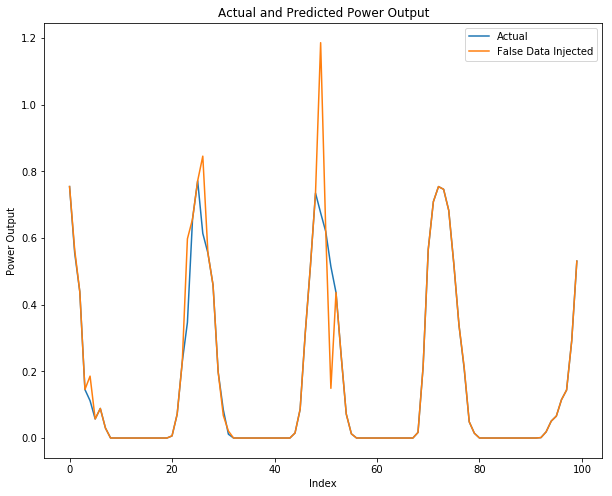

In [68]:
df = pd.DataFrame({'Actual': y})
df['False Data Injected'] = noisy_y 
#df = df.reset_index()
#df = df.drop(['index'], axis=1)
df1 = df.head(100)
df1.plot(kind='line',figsize=(10,8))
#df1
plt.ylabel("Power Output")
plt.xlabel("Index")
#actual  = plt.plot(df1['Actual'], color='blue', label = 'Actual')
#predict = plt.plot(df1['Predicted'], color='red', label = 'Predicted')
plt.title('Actual and Predicted Power Output')
plt.legend(loc='best')
plt.show(block=False)